# **Importando Bibliotecas**

In [62]:
#Importando bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Análise e Tratamento de Dados:**

## Dados de Janeiro

In [63]:
df_jan = pd.read_csv('https://raw.githubusercontent.com/keziacamposcs/PUC_PTI_ProducaoPetroleo/main/producaoMar2022_jan.csv', delimiter=';', error_bad_lines=False, engine='python')

#Consultando as 5 primeiras linhas
df_jan.head()

<ipython-input-63-89ac882eb240>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_jan = pd.read_csv('https://raw.githubusercontent.com/keziacamposcs/PUC_PTI_ProducaoPetroleo/main/producaoMar2022_jan.csv', delimiter=';', error_bad_lines=False, engine='python')


,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
0,2022,01/2022,Alagoas,Alagoas,PARU,4-ALS-39-AL,Mar,Estação de Paru,0.0,438.0,...,0.0,4443.0,1913.0,28.0,935.0,NaN,NaN,NaN,NaN,NaN
1,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-1-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,232.0,...,0.0,15534.0,88893.0,96.0,315.0,NaN,NaN,NaN,NaN,NaN
2,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-2-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,236.0,...,0.0,15523.0,9251.0,96.0,249.0,NaN,NaN,NaN,NaN,NaN
3,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-3-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,175.0,...,0.0,10426.0,60248.0,68.0,815.0,NaN,NaN,NaN,NaN,NaN
4,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-4-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,245.0,...,0.0,16445.0,85832.0,110.0,188.0,NaN,NaN,NaN,NaN,NaN


In [64]:
#Todas as colunas do Data Frame
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 21 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Ano                                               1772 non-null   int64  
 1   Mês/Ano                                           1772 non-null   object 
 2   Estado                                            1772 non-null   object 
 3   Bacia                                             1772 non-null   object 
 4   Campo                                             1772 non-null   object 
 5   Poço                                              1772 non-null   object 
 6   Ambiente                                          1772 non-null   object 
 7   Instalação                                        1772 non-null   object 
 8   Produção de Óleo (m³)                             1362 non-null   float64
 9   Produção de Condens

In [65]:
# Verificando a dimensão dos dados
df_jan.shape

(1772, 21)

---
### Correlação entre os dados




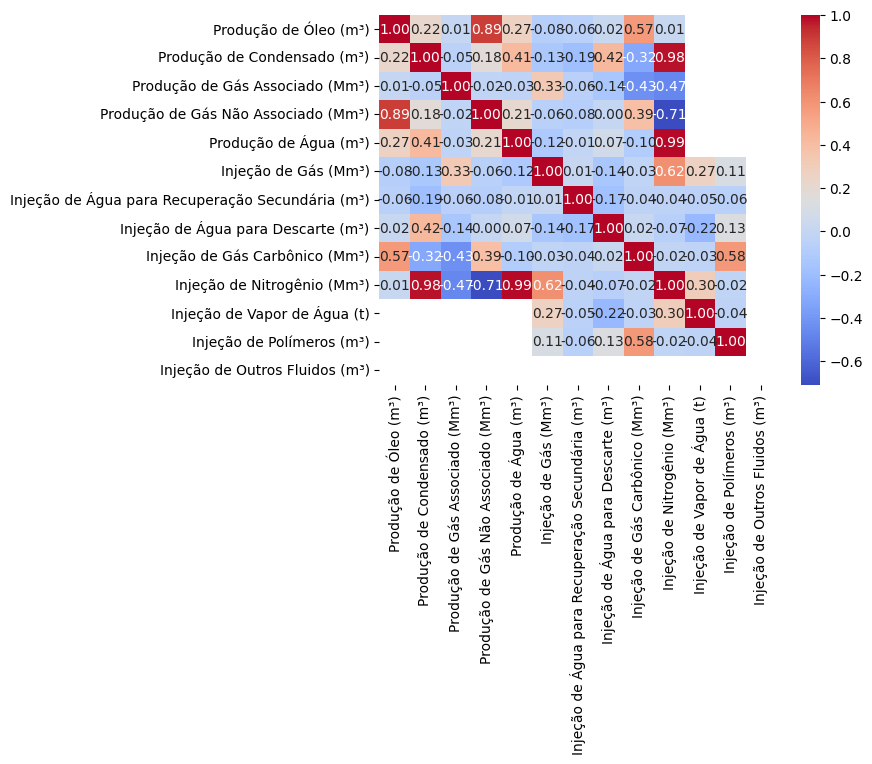

In [66]:
# Ler os dados do arquivo CSV
df_corr = df_jan

# Selecionar apenas as colunas numéricas
numeric_cols = df_corr.select_dtypes(include='float64')

# Calcular a matriz de correlação
corr_matrix = numeric_cols.corr()

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

A **correlação** pode ser usada para determinar quais colunas são mais relevantes para fazer previsões, pois as variáveis com alta correlação tendem a ter uma relação mais forte com a variável alvo que estamos tentando prever.  

Isso pode ajudar na seleção de variáveis para o modelo de previsão, já que não é necessário incluir todas as colunas disponíveis, mas sim aquelas que têm maior impacto na variável alvo.




Colunas par previsão de Produção de Óleo (m³):
- Produção de Óleo
- Produção de Condesado
- Produção de gás associado
- Produção de gás não associado
- Produção de Água
---



In [67]:
df_jan = df_jan.drop(['Ano', 'Mês/Ano', 'Estado', 'Bacia', 'Campo', 'Poço', 'Ambiente','Instalação', 'Injeção de Gás (Mm³)', 'Injeção de Água para Recuperação Secundária (m³)', 'Injeção de Água para Descarte (m³)', 'Injeção de Nitrogênio (Mm³)', 'Injeção de Vapor de Água (t)', 'Injeção de Polímeros (m³)', 'Injeção de Outros Fluidos (m³)', 'Injeção de Gás Carbônico (Mm³)'], axis=1)
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Produção de Óleo (m³)                1362 non-null   float64
 1   Produção de Condensado (m³)          1362 non-null   float64
 2   Produção de Gás Associado (Mm³)      1362 non-null   float64
 3   Produção de Gás Não Associado (Mm³)  1362 non-null   float64
 4   Produção de Água (m³)                1362 non-null   float64
dtypes: float64(5)
memory usage: 69.3 KB


In [68]:
df_jan.fillna(df_jan.mean(), inplace=True)
df_jan.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,438.0,585.0,0.0,4443.0
1,0.0,232.0,114.0,0.0,15534.0
2,0.0,236.0,245.0,0.0,15523.0
3,0.0,175.0,984.0,0.0,10426.0
4,0.0,245.0,725.0,0.0,16445.0


## Dados de Fevereiro

In [69]:
df_fev = pd.read_csv('https://raw.githubusercontent.com/keziacamposcs/PUC_PTI_ProducaoPetroleo/main/producaoMar2022_fev.csv', delimiter=';', error_bad_lines=False, engine='python')

#Consultando as 5 primeiras linhas
df_fev.head()

<ipython-input-69-6a6fdd8ee771>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_fev = pd.read_csv('https://raw.githubusercontent.com/keziacamposcs/PUC_PTI_ProducaoPetroleo/main/producaoMar2022_fev.csv', delimiter=';', error_bad_lines=False, engine='python')


,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
0,2022,02/2022,Alagoas,Alagoas,PARU,4-ALS-39-AL,Mar,Estação de Paru,0.0,243.0,...,0.0,2163.0,47713.0,5.0,1454.0,NaN,NaN,NaN,NaN,NaN
1,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-1-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,193.0,...,0.0,13132.0,62429.0,81.0,422.0,NaN,NaN,NaN,NaN,NaN
2,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-2-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,196.0,...,0.0,13123.0,35597.0,81.0,365.0,NaN,NaN,NaN,NaN,NaN
3,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-3-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,146.0,...,0.0,8814.0,26659.0,58.0,173.0,NaN,NaN,NaN,NaN,NaN
4,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-4-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,204.0,...,0.0,13902.0,72434.0,93.0,146.0,NaN,NaN,NaN,NaN,NaN


In [70]:
#Todas as colunas do Data Frame
df_fev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 21 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Ano                                               1774 non-null   int64  
 1   Mês/Ano                                           1774 non-null   object 
 2   Estado                                            1774 non-null   object 
 3   Bacia                                             1774 non-null   object 
 4   Campo                                             1774 non-null   object 
 5   Poço                                              1774 non-null   object 
 6   Ambiente                                          1774 non-null   object 
 7   Instalação                                        1774 non-null   object 
 8   Produção de Óleo (m³)                             1359 non-null   float64
 9   Produção de Condens

In [71]:
# Verificando a dimensão dos dados
df_fev.shape

(1774, 21)

Colunas par previsão de Produção de Óleo (m³):
- Produção de Óleo
- Produção de Condesado
- Produção de gás associado
- Produção de gás não associado
- Produção de Água
---



In [72]:
df_fev = df_fev.drop(['Ano', 'Mês/Ano', 'Estado', 'Bacia', 'Campo', 'Poço', 'Ambiente','Instalação', 'Injeção de Gás (Mm³)', 'Injeção de Água para Recuperação Secundária (m³)', 'Injeção de Água para Descarte (m³)', 'Injeção de Nitrogênio (Mm³)', 'Injeção de Vapor de Água (t)', 'Injeção de Polímeros (m³)', 'Injeção de Outros Fluidos (m³)', 'Injeção de Gás Carbônico (Mm³)'], axis=1)
df_fev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Produção de Óleo (m³)                1359 non-null   float64
 1   Produção de Condensado (m³)          1359 non-null   float64
 2   Produção de Gás Associado (Mm³)      1359 non-null   float64
 3   Produção de Gás Não Associado (Mm³)  1359 non-null   float64
 4   Produção de Água (m³)                1359 non-null   float64
dtypes: float64(5)
memory usage: 69.4 KB


In [73]:
df_fev.fillna(df_fev.mean(), inplace=True)
df_fev.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,243.0,2902.0,0.0,2163.0
1,0.0,193.0,141.0,0.0,13132.0
2,0.0,196.0,579.0,0.0,13123.0
3,0.0,146.0,435.0,0.0,8814.0
4,0.0,204.0,467.0,0.0,13902.0


In [74]:
# Métricas para análise
from sklearn.metrics import mean_squared_error, r2_score

# **Regressão Linear**

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
train_df_rl = df_jan
train_df_rl.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,438.0,585.0,0.0,4443.0
1,0.0,232.0,114.0,0.0,15534.0
2,0.0,236.0,245.0,0.0,15523.0
3,0.0,175.0,984.0,0.0,10426.0
4,0.0,245.0,725.0,0.0,16445.0


In [77]:
test_df_rl = df_fev
test_df_rl.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,243.0,2902.0,0.0,2163.0
1,0.0,193.0,141.0,0.0,13132.0
2,0.0,196.0,579.0,0.0,13123.0
3,0.0,146.0,435.0,0.0,8814.0
4,0.0,204.0,467.0,0.0,13902.0


In [78]:
# Separando as variáveis independentes da variável dependente
x_train = train_df_rl.drop('Produção de Óleo (m³)', axis=1)
y_train = train_df_rl['Produção de Óleo (m³)']

In [79]:
# Separando as variáveis independentes da variável dependente
x_test = test_df_rl.drop('Produção de Óleo (m³)', axis=1)
y_test = test_df_rl['Produção de Óleo (m³)']

In [80]:
# Criando o modelo
model_rl = LinearRegression()
model_rl.fit(x_train, y_train)

LinearRegression()

In [81]:
# Fazendo a previsão
y_pred = model_rl.predict(x_test)

In [82]:
# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MSE:  99110833.09281187
RMSE:  9955.4423855905
R²:  0.7920251869211343


# **Árvore de Decisão**

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
train_df_ad = df_jan
train_df_ad.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,438.0,585.0,0.0,4443.0
1,0.0,232.0,114.0,0.0,15534.0
2,0.0,236.0,245.0,0.0,15523.0
3,0.0,175.0,984.0,0.0,10426.0
4,0.0,245.0,725.0,0.0,16445.0


In [85]:
test_df_ad = df_fev
test_df_ad.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,243.0,2902.0,0.0,2163.0
1,0.0,193.0,141.0,0.0,13132.0
2,0.0,196.0,579.0,0.0,13123.0
3,0.0,146.0,435.0,0.0,8814.0
4,0.0,204.0,467.0,0.0,13902.0


In [86]:
# Separando as variáveis independentes da variável dependente
x_train = train_df_ad.drop('Produção de Óleo (m³)', axis=1)
y_train = train_df_ad['Produção de Óleo (m³)']

In [87]:
# Separando as variáveis independentes da variável dependente
x_test = test_df_ad.drop('Produção de Óleo (m³)', axis=1)
y_test = test_df_ad['Produção de Óleo (m³)']

In [88]:
# Criando o modelo
model_ad = DecisionTreeRegressor(random_state=42)
model_ad.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [89]:
# Fazendo a previsão
y_pred = model_ad.predict(x_test)

In [90]:
# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MSE:  117480239.07145894
RMSE:  10838.830152348497
R²:  0.753478706626681


# **Random Forest**

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
train_df_rf = df_jan
train_df_rf.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,438.0,585.0,0.0,4443.0
1,0.0,232.0,114.0,0.0,15534.0
2,0.0,236.0,245.0,0.0,15523.0
3,0.0,175.0,984.0,0.0,10426.0
4,0.0,245.0,725.0,0.0,16445.0


In [93]:
test_df_rf = df_fev
test_df_rf.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,243.0,2902.0,0.0,2163.0
1,0.0,193.0,141.0,0.0,13132.0
2,0.0,196.0,579.0,0.0,13123.0
3,0.0,146.0,435.0,0.0,8814.0
4,0.0,204.0,467.0,0.0,13902.0


In [94]:
# Separando as variáveis independentes da variável dependente
x_train = train_df_rf.drop('Produção de Óleo (m³)', axis=1)
y_train = train_df_rf['Produção de Óleo (m³)']

In [95]:
# Separando as variáveis independentes da variável dependente
x_test = test_df_rf.drop('Produção de Óleo (m³)', axis=1)
y_test = test_df_rf['Produção de Óleo (m³)']

In [96]:
# Criando o modelo
model_rf = DecisionTreeRegressor(random_state=42)
model_rf.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [97]:
# Fazendo a previsão
y_pred = model_rf.predict(x_test)

In [98]:
# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MSE:  117480239.07145894
RMSE:  10838.830152348497
R²:  0.753478706626681


# **Redes Neurais**

In [99]:
from sklearn.neural_network import MLPRegressor

In [100]:
train_df_rn = df_jan
train_df_rn.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,438.0,585.0,0.0,4443.0
1,0.0,232.0,114.0,0.0,15534.0
2,0.0,236.0,245.0,0.0,15523.0
3,0.0,175.0,984.0,0.0,10426.0
4,0.0,245.0,725.0,0.0,16445.0


In [101]:
test_df_rn = df_fev
test_df_rn.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,243.0,2902.0,0.0,2163.0
1,0.0,193.0,141.0,0.0,13132.0
2,0.0,196.0,579.0,0.0,13123.0
3,0.0,146.0,435.0,0.0,8814.0
4,0.0,204.0,467.0,0.0,13902.0


In [102]:
# Separando as variáveis independentes da variável dependente
x_train = train_df_rn.drop('Produção de Óleo (m³)', axis=1)
y_train = train_df_rn['Produção de Óleo (m³)']

In [103]:
# Separando as variáveis independentes da variável dependente
x_test = test_df_rn.drop('Produção de Óleo (m³)', axis=1)
y_test = test_df_rn['Produção de Óleo (m³)']

In [104]:
#Criando modelo de Redes Neurais
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000)

In [105]:
mlp.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)

In [106]:
# Fazendo a previsão
y_pred = mlp.predict(x_test)

In [107]:
# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MSE:  76416197.15259022
RMSE:  8741.63583962351
R²:  0.8396477577367844
